### Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import torch
import csv
import pandas as pd
import gspread
import pickle
import requests
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# data_path = '/content/gdrive/MyDrive/IR A3/Electronics_5.json'
# metadata_path = '/content/gdrive/MyDrive/IR A3/meta_Electronics.json'
# electronics_csv_path = '/content/gdrive/MyDrive/IR A3/Electronics.csv'

# df_path = '/content/gdrive/MyDrive/IR A3/turntables_filtered_df.pkl'
df_path = '/content/gdrive/MyDrive/IR A3/processed_turntables_df.pkl'
# metadata_path = '/content/gdrive/MyDrive/IR A3/turntables_metadata_df.pkl'
# ratings_path = '/content/gdrive/MyDrive/IR A3/ratings_df.pkl'

In [5]:
df = pd.read_pickle(df_path)
# ratings_df = pd.read_pickle(ratings_path)
# metadata_df = pd.read_pickle(metadata_path)

In [ ]:
# print(len(df))
# print(len(metadata_df))
# print(len(ratings_df))

In [ ]:
# import gc

# gc.collect()

### Data Loading

In [ ]:
def parse_unzipped(path):
    with open(path, 'r') as file:
        for line in file:
            yield json.loads(line)

def getDF_unzipped_chunked(path, chunk_size=10000):
    chunks = []
    for chunk in tqdm(pd.read_json(path, lines=True, chunksize=chunk_size), desc='Processing chunks'):
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

df = getDF_unzipped_chunked(data_path)

Processing chunks: 674it [02:27,  4.58it/s]


In [ ]:
# df.to_pickle('/content/gdrive/MyDrive/IR A3/initial_df.pkl')

In [ ]:
df = pd.read_pickle('/content/gdrive/MyDrive/IR A3/initial_df.pkl')

In [ ]:
len(df)

6739590

In [ ]:
def getDF_unzipped_chunked(path, chunk_size=10000, limit=None):
    chunks = []
    for chunk in tqdm(pd.read_json(path, lines=True, chunksize=chunk_size), desc='Processing chunks'):
        chunks.append(chunk)
        if limit and sum(len(c) for c in chunks) >= limit:
            break
    return pd.concat(chunks, ignore_index=True)

meta_df = getDF_unzipped_chunked(metadata_path, limit=1000000)

In [ ]:
def getDF_unzipped_chunked(path, chunk_size=10000, start=0, end=786868, limit=None):
    chunks = []
    i = 0
    for chunk in tqdm(pd.read_json(path, lines=True, chunksize=chunk_size), desc='Processing chunks'):
        i += chunk_size
        if i - chunk_size <= start:
            continue
        chunks.append(chunk)
        if i > end:
            break
    return pd.concat(chunks, ignore_index=True)

In [ ]:
# ratings_df.columns = ['asin', 'reviewerID', 'overall', 'unixReviewTime']

In [ ]:
meta_df3 = getDF_unzipped_chunked(metadata_path, start=500000, end=800000)

Processing chunks: 79it [03:17,  2.50s/it]


In [ ]:
meta_df.tail()

In [ ]:
meta_df2.tail()

In [ ]:
meta_df3.to_pickle('/content/gdrive/MyDrive/IR A3/meta_df_500k_to_800k.pkl')

In [ ]:
# meta_df1 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/meta_df_100k.pkl')
# meta_df2 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/meta_df_100k_to_500k.pkl')
meta_df3 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/meta_df_500k_to_800k.pkl')

In [ ]:
# del meta_df1
# del meta_df2

#### Turntables

In [ ]:
turntable_df3 = meta_df3[meta_df3['title'].str.contains('turntable', case=False, na=False)]

In [ ]:
# len(turntable_df1)
# len(turntable_df2)
len(turntable_df3)

402

In [ ]:
# turntable_df1.to_pickle('/content/gdrive/MyDrive/IR A3/turntable_df1.pkl')
# turntable_df2.to_pickle('/content/gdrive/MyDrive/IR A3/turntable_df2.pkl')
turntable_df3.to_pickle('/content/gdrive/MyDrive/IR A3/turntable_df3.pkl')

In [ ]:
turntables_dfs = []
turntable_df1 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/turntable_df1.pkl')
turntable_df2 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/turntable_df2.pkl')
# turntable_df3 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/turntable_df3.pkl')

turntables_dfs.append(turntable_df1)
turntables_dfs.append(turntable_df2)
turntables_dfs.append(turntable_df3)

In [ ]:
turntables_df = pd.concat(turntables_dfs, ignore_index=True)

In [ ]:
len(turntables_df)

In [ ]:
turntables_df.to_pickle('/content/gdrive/MyDrive/IR A3/turntables_df.pkl')

In [ ]:
turntables_df_path = '/content/gdrive/MyDrive/IR A3/turntables_df.pkl'
turntables_df = pd.read_pickle(turntables_df_path)

#### Headphones

In [ ]:
headphone_df2.head()

In [ ]:
headphone_dfs = []
headphone_df_1 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/headphone_df_1.pkl')
headphone_df_2 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/headphone_df_2.pkl')
headphone_df_3 = pd.read_pickle('/content/gdrive/MyDrive/IR A3/headphone_df_3.pkl')

headphone_dfs.append(headphone_df_1)
headphone_dfs.append(headphone_df_2)
headphone_dfs.append(headphone_df_3)

In [ ]:
headphone_df = pd.concat(headphone_dfs, ignore_index=True)

In [ ]:
headphone_df.head()

In [ ]:
headphone_df.to_pickle('/content/gdrive/MyDrive/IR A3/metadata_df.pkl')

#### Combining

In [ ]:
print(len(df))
print(len(turntables_df))

6739590
919


In [ ]:
df_asin_values = set(df['asin'])
metadata_asin_values = set(turntables_df['asin'])
# ratings_asin_values = set(ratings_df['asin'])

common_asin_values = df_asin_values.intersection(metadata_asin_values)

In [ ]:
filtered_df = df[df['asin'].isin(common_asin_values)]
filtered_metadata_df = turntables_df[turntables_df['asin'].isin(common_asin_values)]
# filtered_ratings_df = ratings_df[ratings_df['asin'].isin(common_asin_values)]

In [ ]:
filtered_df.to_pickle('/content/gdrive/MyDrive/IR A3/turntables_filtered_df.pkl')
filtered_metadata_df.to_pickle('/content/gdrive/MyDrive/IR A3/turntables_metadata_df.pkl')
# filtered_ratings_df.to_pickle('/content/gdrive/MyDrive/IR A3/ratings_df.pkl')

In [ ]:
print(len(filtered_df))
print(len(filtered_metadata_df))
# print(len(filtered_ratings_df))

9393
276


### Data Cleaning

In [ ]:
# Report the total number of rows for each DataFrame
total_rows_df = len(df)
total_rows_metadata_df = len(metadata_df)
# total_rows_ratings_df = len(ratings_df)

# Handling missing values and duplicates for each DataFrame
df.dropna(how='all', inplace=True)
# df.drop_duplicates(inplace=True)

metadata_df.dropna(how='all', inplace=True)
# metadata_df.drop_duplicates(inplace=True)

# ratings_df.dropna(how='all', inplace=True)
# ratings_df.drop_duplicates(inplace=True)

# Report the number of rows after preprocessing for each DataFrame
processed_rows_df = len(df)
processed_rows_metadata_df = len(metadata_df)
# processed_rows_ratings_df = len(ratings_df)

print(f"Total number of rows in df before preprocessing: {total_rows_df}")
print(f"Total number of rows in metadata_df before preprocessing: {total_rows_metadata_df}")
# print(f"Total number of rows in ratings_df before preprocessing: {total_rows_ratings_df}")

print(f"Total number of rows in df after preprocessing: {processed_rows_df}")
print(f"Total number of rows in metadata_df after preprocessing: {processed_rows_metadata_df}")
# print(f"Total number of rows in ratings_df after preprocessing: {processed_rows_ratings_df}")

Total number of rows in df before preprocessing: 9393
Total number of rows in metadata_df before preprocessing: 276
Total number of rows in df after preprocessing: 9393
Total number of rows in metadata_df after preprocessing: 276


In [ ]:
df_subset_cols = ['overall', 'vote', 'verified', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime']
metadata_df_subset_cols = ['title', 'brand', 'main_cat', 'similar_item', 'date', 'price', 'asin']

#### Dropping Columns

In [ ]:
df.drop(columns=['image'], inplace=True)

In [ ]:
metadata_df.drop(columns=['imageURL'], inplace=True)
metadata_df.drop(columns=['imageURLHighRes'], inplace=True)

In [ ]:
values = metadata_df['tech1'].tolist().count('')
print(values)
print(len(metadata_df))
metadata_df.drop(columns=['tech1'], inplace=True)

274
276


In [ ]:
values = metadata_df['fit'].tolist().count('')
print(values)
print(len(metadata_df))
metadata_df.drop(columns=['fit'], inplace=True)

276
276


In [ ]:
values = metadata_df['also_buy'].tolist().count([])
print(values)
print(len(metadata_df))

161
276


In [ ]:
values = metadata_df['details'].tolist().count({})
print(values)
print(len(metadata_df))
metadata_df.drop(columns=['details'], inplace=True)

273
276


In [ ]:
values = metadata_df['tech2'].tolist().count('')
print(values)
print(len(metadata_df))
metadata_df.drop(columns=['tech2'], inplace=True)

275
276


#### Duplicates

In [ ]:
df.head()

In [ ]:
num_duplicates = df.duplicated(subset=df_subset_cols).sum()

print(f"Number of duplicates based on subset columns: {num_duplicates}")

Number of duplicates based on subset columns: 224


In [ ]:
len(df)

9393

In [ ]:
df.drop_duplicates(subset=df_subset_cols, inplace=True)

In [ ]:
num_duplicates = metadata_df.duplicated(subset=metadata_df_subset_cols).sum()

print(f"Number of duplicates based on subset columns: {num_duplicates}")

Number of duplicates based on subset columns: 17


In [ ]:
metadata_df.drop_duplicates(subset=metadata_df_subset_cols, inplace=True)

In [ ]:
# num_duplicates = ratings_df.duplicated().sum()

# print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 22790


In [ ]:
# ratings_df.drop_duplicates(inplace=True)

In [ ]:
df.to_pickle('/content/gdrive/MyDrive/IR A3/cleaned_df.pkl')
metadata_df.to_pickle('/content/gdrive/MyDrive/IR A3/cleaned_metadata_df.pkl')
# ratings_df.to_pickle('/content/gdrive/MyDrive/IR A3/cleaned_ratings_df.pkl')

### Descriptive Statistics

In [ ]:
len(df)

398307

In [ ]:
df.head()

In [ ]:
num_reviews = len(df)

avg_rating = df['overall'].mean()

num_unique_products = df['asin'].nunique()

num_good_ratings = df[df['overall'] >= 3].shape[0]

num_bad_ratings = df[df['overall'] < 3].shape[0]

num_reviews_per_rating = df['overall'].value_counts().sort_index()

print(f"Number of Reviews: {num_reviews}")
print(f"Average Rating Score: {avg_rating:.2f}")
print(f"Number of Unique Products: {num_unique_products}")
print(f"Number of Good Ratings: {num_good_ratings}")
print(f"Number of Bad Ratings: {num_bad_ratings}")
print("Number of Reviews corresponding to each Rating:")
print(num_reviews_per_rating)

Number of Reviews: 9169
Average Rating Score: 4.15
Number of Unique Products: 259
Number of Good Ratings: 7910
Number of Bad Ratings: 1259
Number of Reviews corresponding to each Rating:
1     782
2     477
3     737
4    1774
5    5399
Name: overall, dtype: int64


### Preprocessing

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'<.*?>', '', text)
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        text = re.sub(r"i'm", "i am", text, flags=re.IGNORECASE)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
        text = ' '.join(tokens).lower()
        return text
    else:
        return text

df['reviewText'] = df['reviewText'].apply(preprocess_text)

In [ ]:
df.to_pickle('/content/gdrive/MyDrive/IR A3/processed_turntables_df.pkl')

### EDA

In [ ]:
merged_df = pd.merge(df, metadata_df, on='asin', how='outer')

In [ ]:
merged_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,title,also_buy,brand,feature,rank,also_view,main_cat,similar_item,date,price
0,4,24.0,False,"04 1, 2005",A3SS6919NRQ2MF,B00001ZWTY,NaN,Corn Fed,sony ps lxh good entry point retro world good ...,Good Manual Turntable,...,Sony PSLX350H Stereo Turntable System (Discont...,[],Sony,"[Full manual operation, Pitch control, Full-si...","[>#500,432 in Electronics (See Top 100 in Elec...","[B01F2B3FKI, B00GA9COMM, B0015HOFZI, B000FMNBX...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 18, 2004",
1,4,158.0,False,"04 19, 2004",A8Z12UC2IMSTR,B00001ZWTY,NaN,RDK,purchased sony pslxh replace yearold technics ...,Sony PS-LX350H - VG Consumer Turntable,...,Sony PSLX350H Stereo Turntable System (Discont...,[],Sony,"[Full manual operation, Pitch control, Full-si...","[>#500,432 in Electronics (See Top 100 in Elec...","[B01F2B3FKI, B00GA9COMM, B0015HOFZI, B000FMNBX...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 18, 2004",
2,2,2.0,False,"09 1, 2010",A1CBJDHRDQREDR,B00001ZWTY,NaN,S. Jones,first please note comment relate turntable con...,Buyer beware,...,Sony PSLX350H Stereo Turntable System (Discont...,[],Sony,"[Full manual operation, Pitch control, Full-si...","[>#500,432 in Electronics (See Top 100 in Elec...","[B01F2B3FKI, B00GA9COMM, B0015HOFZI, B000FMNBX...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 18, 2004",
3,5,2.0,True,"05 7, 2011",A3IYGLSQ6N2G3G,B00001ZWTY,NaN,Kindle Customer,old late sony carbon fiber tonearm fully autom...,Great Bang for the Buck!,...,Sony PSLX350H Stereo Turntable System (Discont...,[],Sony,"[Full manual operation, Pitch control, Full-si...","[>#500,432 in Electronics (See Top 100 in Elec...","[B01F2B3FKI, B00GA9COMM, B0015HOFZI, B000FMNBX...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 18, 2004",
4,4,3.0,False,"01 6, 2011",A3P6OWYSHBXE5T,B00001ZWTY,NaN,Paul Schuster,nice playing turntable simple design easy use ...,Listen to the SONY turntable,...,Sony PSLX350H Stereo Turntable System (Discont...,[],Sony,"[Full manual operation, Pitch control, Full-si...","[>#500,432 in Electronics (See Top 100 in Elec...","[B01F2B3FKI, B00GA9COMM, B0015HOFZI, B000FMNBX...",Home Audio & Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 18, 2004",


In [ ]:
print(len(df))
print(len(metadata_df))
print(len(merged_df))

9169
259
9169


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Top 20 most reviewed brands
top_20_most_reviewed_brands = merged_df['brand'].value_counts().head(20)

# Top 20 least reviewed brands
top_20_least_reviewed_brands = merged_df['brand'].value_counts().tail(20)

# Most positively reviewed 'Headphone'
most_positively_reviewed_headphone = merged_df[merged_df['overall'] == 5]['asin'].value_counts().idxmax()

print("Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)

print("\nTop 20 least reviewed brands:")
print(top_20_least_reviewed_brands)

print(f"\nMost positively reviewed 'Headphone': {most_positively_reviewed_headphone}")

Top 20 most reviewed brands:
Jensen            1303
Audio-Technica    1149
WOCKODER           797
Pyle               795
Crosley            758
Victrola           462
ION Audio          450
Sony               320
Micca              305
Electrohome        254
Teac               228
BoxLegend          166
Pro-Ject           147
GOODNEW            135
Numark             115
Sylvania           115
Ion                114
Pioneer            111
1byone             102
Turntable Toys      96
Name: brand, dtype: int64

Top 20 least reviewed brands:
Accessory Genie              10
TDK                          10
LuguLake                      8
Vibe                          8
MUSITREND                     8
Milestone Av Technologies     7
PAXCESS                       7
Intellitouch                  7
Thorens                       7
CD Supply                     6
Craig Electronics             6
Miles Kimball                 5
TacPower                      5
jWIN                          5
GE    

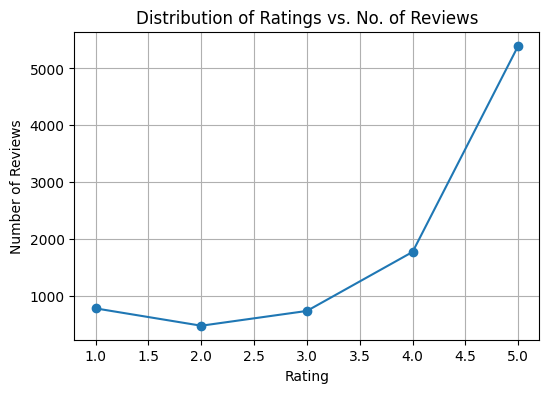

In [ ]:
ratings_distribution = merged_df['overall'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
plt.plot(ratings_distribution.index, ratings_distribution.values, marker='o')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings vs. No. of Reviews')
plt.grid(True)
plt.show()

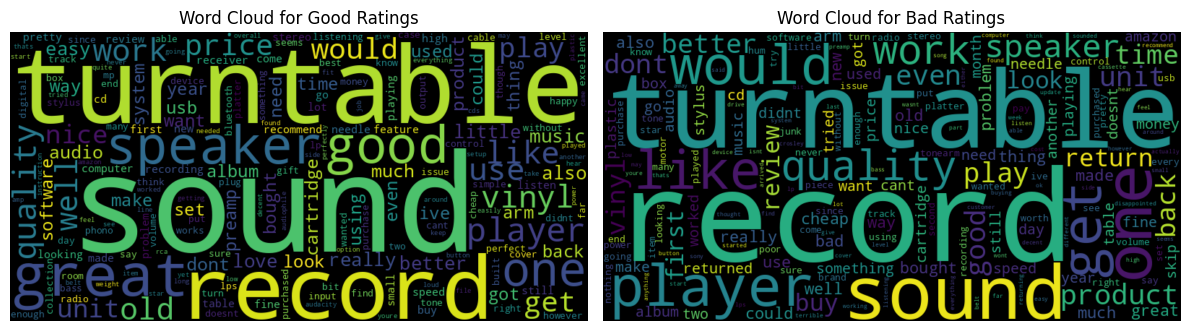

In [ ]:
# Word Cloud for 'Good' and 'Bad' ratings
good_ratings_word_cloud = WordCloud(width=800, height=400).generate_from_frequencies(Counter(" ".join(merged_df[merged_df['overall'] >= 3]['reviewText'].astype(str)).split()))
bad_ratings_word_cloud = WordCloud(width=800, height=400).generate_from_frequencies(Counter(" ".join(merged_df[merged_df['overall'] < 3]['reviewText'].astype(str)).split()))

# Display Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_ratings_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Good Ratings')

plt.subplot(1, 2, 2)
plt.imshow(bad_ratings_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bad Ratings')

plt.tight_layout()
plt.show()

In [ ]:
merged_df['date']

0                      
1                      
2                      
3                      
4                      
              ...      
398302    June 14, 2016
398303    June 14, 2016
398304    June 14, 2016
398305    June 14, 2016
398306    June 14, 2016
Name: date, Length: 398307, dtype: object

In [ ]:
# Convert 'date' column to datetime format, coerce errors to NaT for invalid values
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Drop rows with NaT values (missing or invalid dates)
date_df = merged_df.dropna(subset=['date'])

# Year with maximum reviews
year_with_max_reviews = date_df.groupby(date_df['date'].dt.year)['asin'].count().idxmax()

# Year with highest number of customers
year_with_highest_customers = date_df.groupby(date_df['date'].dt.year)['reviewerID'].nunique().idxmax()

# Number of reviews for the year with the highest number of customers
reviews_for_max_customers = date_df[date_df['date'].dt.year == year_with_highest_customers]['asin'].count()

# Number of unique users for the year with the highest number of customers
unique_users_for_max_customers = date_df[date_df['date'].dt.year == year_with_highest_customers]['reviewerID'].nunique()

print("\nYear with maximum reviews:", year_with_max_reviews)
print("\nYear with highest number of customers:", year_with_highest_customers)
print("\nNumber of reviews for the year with the highest number of customers:", reviews_for_max_customers)
print("\nNumber of unique users for the year with the highest number of customers:", unique_users_for_max_customers)


Year with maximum reviews: 2015

Year with highest number of customers: 2015

Number of reviews for the year with the highest number of customers: 1198

Number of unique users for the year with the highest number of customers: 1185


### Feature Engineering

In [ ]:
import nltk

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import multiprocessing
import numpy as np

tokenized_text = [word_tokenize(str(text).lower()) for text in df['reviewText'].values if not pd.isnull(text)]

cores = multiprocessing.cpu_count()  # Number of CPU cores
w2v_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=cores)

In [ ]:
word = 'good'
similar_words = w2v_model.wv.most_similar(word, topn=5)

print(f"Most similar words to '{word}': {similar_words}")

Most similar words to 'good': [('amazing', 0.9634362459182739), ('ok', 0.9464921355247498), ('fantastic', 0.9458152651786804), ('expected', 0.9328287243843079), ('impressed', 0.9251856207847595)]


In [ ]:
word = 'bad'
similar_words = w2v_model.wv.most_similar(word, topn=5)

print(f"Most similar words to '{word}': {similar_words}")

Most similar words to 'bad': [('point', 0.954521656036377), ('expecting', 0.9475014209747314), ('fair', 0.945181131362915), ('hype', 0.9437717199325562), ('considering', 0.9437171220779419)]


In [ ]:
with open('/content/gdrive/MyDrive/IR A3/tt_word2vec_model.pkl', 'wb') as f:
    pickle.dump(w2v_model, f)

In [ ]:
with open('/content/gdrive/MyDrive/IR A3/tt_word2vec_model.pkl', 'rb') as f:
    w2v_model = pickle.load(f)

### Data Split

In [ ]:
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

In [ ]:
# Convert NaN values to empty strings in 'reviewText' column
df['reviewText'] = df['reviewText'].fillna('')

In [ ]:
df['Rating_Class'] = df['overall'].apply(categorize_rating)

In [ ]:
X = df['reviewText']
y = df['Rating_Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

log_reg_pipeline = Pipeline([
    # ('word2vec', Word2VecAveragingTransformer(w2v_model)),
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', LogisticRegression(max_iter=1000))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred_log_reg = log_reg_pipeline.predict(X_test)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Average       0.18      0.24      0.21       170
         Bad       0.61      0.55      0.58       340
        Good       0.88      0.88      0.88      1783

    accuracy                           0.78      2293
   macro avg       0.56      0.55      0.55      2293
weighted avg       0.79      0.78      0.79      2293



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipeline = Pipeline([
    # ('word2vec', Word2VecAveragingTransformer(w2v_model)),
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.00      0.00      0.00       170
         Bad       1.00      0.02      0.03       340
        Good       0.78      1.00      0.88      1783

    accuracy                           0.78      2293
   macro avg       0.59      0.34      0.30      2293
weighted avg       0.75      0.78      0.69      2293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_pipeline = Pipeline([
    # ('word2vec', Word2VecAveragingTransformer(w2v_model)),
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', XGBClassifier())
])

xgb_pipeline.fit(X_train, y_train_encoded)

y_pred_xgb = xgb_pipeline.predict(X_test)

y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb_labels))

Classification Report for XGBoost:
              precision    recall  f1-score   support

     Average       0.40      0.10      0.16       170
         Bad       0.80      0.47      0.59       340
        Good       0.85      0.98      0.91      1783

    accuracy                           0.84      2293
   macro avg       0.69      0.52      0.56      2293
weighted avg       0.81      0.84      0.81      2293



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

svm_pipeline = Pipeline([
    # ('word2vec', Word2VecAveragingTransformer(w2v_model)),
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', SVC())
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

     Average       1.00      0.02      0.03       170
         Bad       0.97      0.09      0.16       340
        Good       0.79      1.00      0.88      1783

    accuracy                           0.79      2293
   macro avg       0.92      0.37      0.36      2293
weighted avg       0.83      0.79      0.71      2293



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_tensor = torch.tensor(X_train_tfidf.toarray(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_tfidf.toarray(), dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

class SimpleNN(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(5000, 100)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(100, 3)
        self.attention = nn.MultiheadAttention(embed_dim=100, num_heads=5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = SimpleNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

num_epochs = 20
batch_size = 16

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)

        print(f"Epoch {epoch+1}, Accuracy: {accuracy}")

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    print(classification_report(y_test_encoded, predicted.cpu().numpy()))

Epoch 1, Accuracy: 0.7775839511556912
Epoch 2, Accuracy: 0.7775839511556912
Epoch 3, Accuracy: 0.7775839511556912
Epoch 4, Accuracy: 0.7867422590492804
Epoch 5, Accuracy: 0.8085477540340166
Epoch 6, Accuracy: 0.829917139119058
Epoch 7, Accuracy: 0.8460532054077627
Epoch 8, Accuracy: 0.8491059747056258
Epoch 9, Accuracy: 0.8525948539031836
Epoch 10, Accuracy: 0.8547754034016573
Epoch 11, Accuracy: 0.8600087221979938
Epoch 12, Accuracy: 0.8604448320976886
Epoch 13, Accuracy: 0.8626253815961622
Epoch 14, Accuracy: 0.8669864805931095
Epoch 15, Accuracy: 0.8648059310946359
Epoch 16, Accuracy: 0.86611426079372
Epoch 17, Accuracy: 0.8665503706934148
Epoch 18, Accuracy: 0.8643698211949411
Epoch 19, Accuracy: 0.863061491495857
Epoch 20, Accuracy: 0.86611426079372
              precision    recall  f1-score   support

           0       0.48      0.12      0.20       170
           1       0.78      0.68      0.73       340
           2       0.89      0.97      0.93      1783

    accuracy     

### Collaborative Filtering

In [6]:
duplicates = df.duplicated(subset=['reviewerID', 'asin'])
print(duplicates.sum())
df = df[~duplicates]

104


In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import cosine_similarity

ratings_matrix = df.pivot(index='reviewerID', columns='asin', values='overall')

ratings_matrix = ratings_matrix.fillna(3)

ratings_matrix_normalized = (ratings_matrix - ratings_matrix.min()) / (ratings_matrix.max() - ratings_matrix.min())

K_values = [10, 20, 30, 40, 50]

K_folds = 5

In [ ]:
# ratings_matrix_normalized = ratings_matrix_normalized.fillna(ratings_matrix_normalized.mean())

In [8]:
ratings_matrix_normalized.head()

asin,B00001ZWTY,B00004U89X,B00004U89Y,B00005NDMR,B00005T3XH,B00005T3Y8,B00006HO3O,B00006I5VX,B00009V3TU,B0000BZHGV,...,B01G9CS8V0,B01G9CSAH2,B01G9CSON2,B01GFDB720,B01GQJ8C5S,B01GQKV6AU,B01GRYDU1I,B01GXX3DJ2,B01H0YL6O2,B01HD7CZMS
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0986263H7SX62P1SRDD,0.333333,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.333333,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
A100R7YT9NLMZU,0.333333,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.333333,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
A101A5HAADYZMO,0.333333,0.0,0.0,0.5,0.5,0.5,0.5,1.0,0.5,0.5,...,0.5,0.333333,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
A101NNJQO88DLX,0.333333,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.333333,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
A101RHMKIWMCRS,0.333333,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.333333,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5


In [10]:
user_mae_scores = []
for K in K_values:
    fold_mae_scores = []
    kf = KFold(n_splits=K_folds)
    for train_index, val_index in kf.split(ratings_matrix_normalized):
        train_matrix = ratings_matrix_normalized.iloc[train_index]
        val_matrix = ratings_matrix_normalized.iloc[val_index]

        user_similarity = cosine_similarity(train_matrix)

        predicted_ratings = np.zeros_like(val_matrix)
        for i in range(len(val_matrix)):
            similar_users_indices = np.argsort(user_similarity[i])[-K-1:-1]
            similar_users_ratings = train_matrix.iloc[similar_users_indices]

            weights = user_similarity[i][similar_users_indices]
            predicted_ratings[i] = np.sum(weights.reshape(-1, 1) * similar_users_ratings, axis=0) / np.sum(weights)

        fold_mae = mean_absolute_error(val_matrix.values.flatten(), predicted_ratings.flatten())
        fold_mae_scores.append(fold_mae)

    user_mae = np.mean(fold_mae_scores)
    user_mae_scores.append(user_mae)

In [11]:
item_mae_scores = []
for K in K_values:
    fold_mae_scores = []
    kf = KFold(n_splits=K_folds)
    for train_index, val_index in kf.split(ratings_matrix_normalized.T):
        train_matrix = ratings_matrix_normalized.T.iloc[train_index]
        val_matrix = ratings_matrix_normalized.T.iloc[val_index]

        item_similarity = cosine_similarity(train_matrix)

        predicted_ratings = np.zeros_like(val_matrix)
        for i in range(len(val_matrix)):
            similar_items_indices = np.argsort(item_similarity[i])[-K-1:-1]
            similar_items_ratings = train_matrix.iloc[similar_items_indices]

            weights = item_similarity[i][similar_items_indices]
            predicted_ratings[i] = np.sum(weights.reshape(-1, 1) * similar_items_ratings, axis=0) / np.sum(weights)

        fold_mae = mean_absolute_error(val_matrix.values.flatten(), predicted_ratings.flatten())
        fold_mae_scores.append(fold_mae)

    item_mae = np.mean(fold_mae_scores)
    item_mae_scores.append(item_mae)

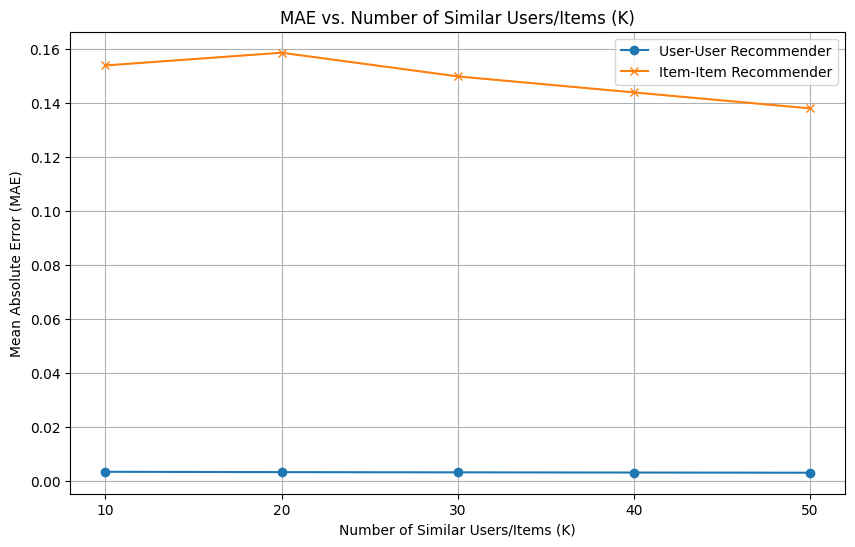

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(K_values, user_mae_scores, marker='o', label='User-User Recommender')
plt.plot(K_values, item_mae_scores, marker='x', label='Item-Item Recommender')
plt.xlabel('Number of Similar Users/Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Similar Users/Items (K)')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()

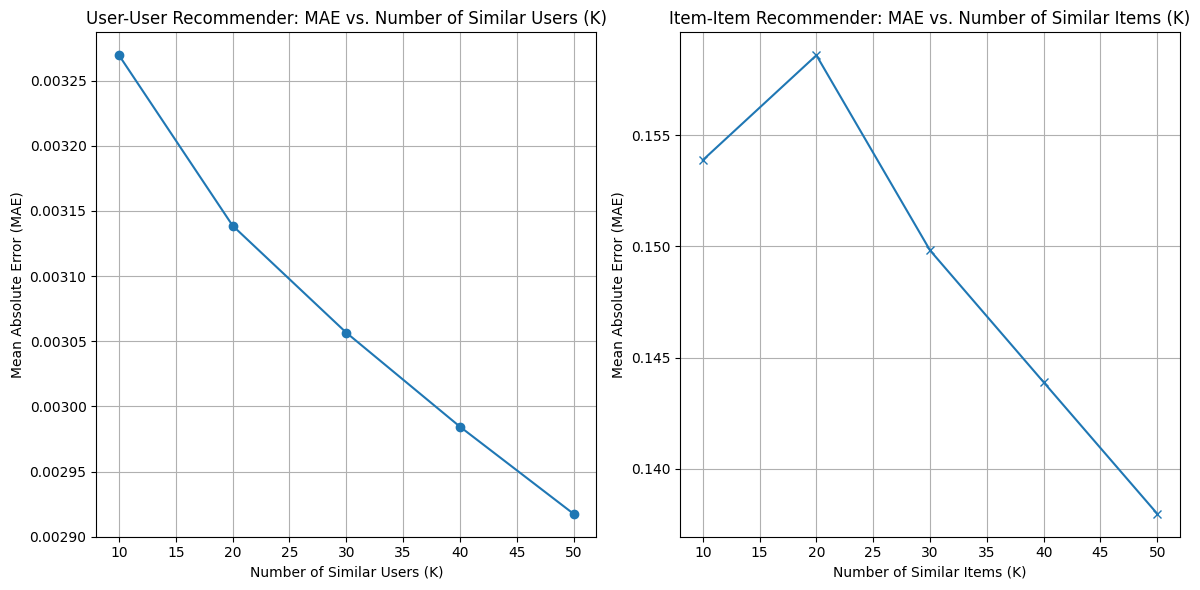

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K_values, user_mae_scores, marker='o')
plt.xlabel('Number of Similar Users (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('User-User Recommender: MAE vs. Number of Similar Users (K)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_values, item_mae_scores, marker='x')
plt.xlabel('Number of Similar Items (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Item-Item Recommender: MAE vs. Number of Similar Items (K)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
product_sum_ratings = ratings_matrix_normalized.sum(axis=0)

top_10_products = product_sum_ratings.nlargest(10)

print("Top 10 Products by User Sum Ratings:")
for product_id, sum_rating in top_10_products.items():
    print(f"Product ID: {product_id}, Sum Rating: {sum_rating}")

Top 10 Products by User Sum Ratings:
Product ID: B001DYVIGW, Sum Rating: 8343.5
Product ID: B00439QA1C, Sum Rating: 5564.000000000296
Product ID: B00BCA4116, Sum Rating: 4322.25
Product ID: B009IUIV4A, Sum Rating: 4287.25
Product ID: B00025742A, Sum Rating: 4286.0
Product ID: B01691UGGG, Sum Rating: 4276.5
Product ID: B00PU3YI50, Sum Rating: 4247.25
Product ID: B00IGDHTXY, Sum Rating: 4244.25
Product ID: B000UVKE2I, Sum Rating: 4241.25
Product ID: B00GA9COMM, Sum Rating: 4229.5
